In [2]:
import os
from bmtool import bmplot
%matplotlib inline

config_file = os.path.join('..', 'Network-Parameters', 'config.json')

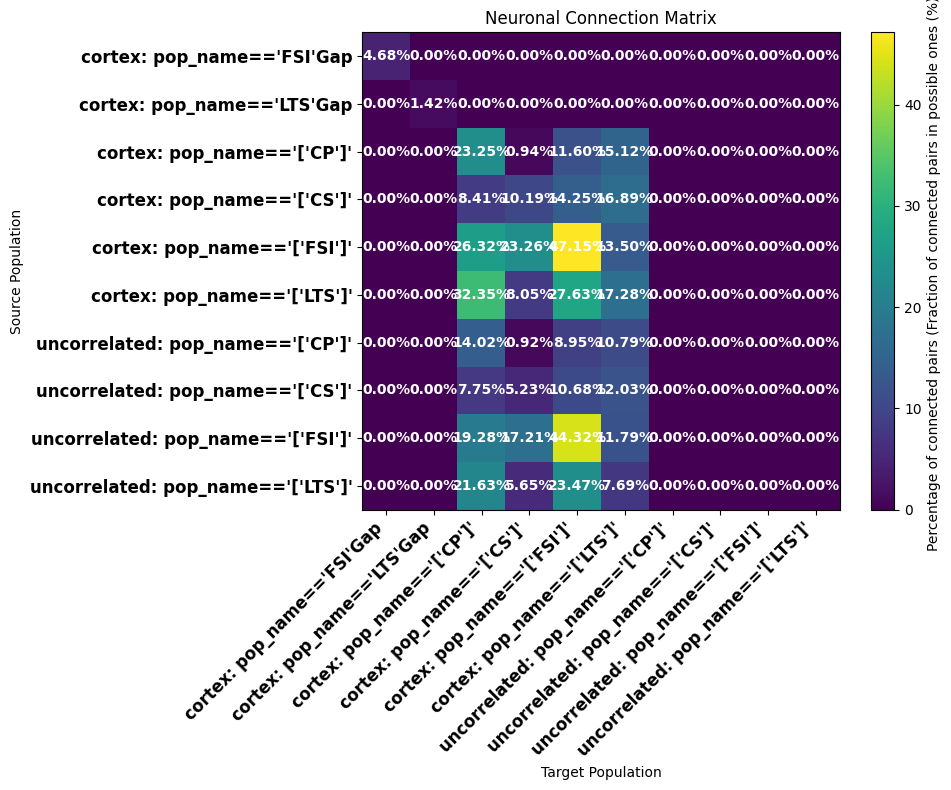

In [1]:
from bmtool import bmplot
# connection report from build network. Very helpful for looking at precent conn in a distance depended network
bmplot.connector_percent_matrix(csv_path='../Network-Parameters/connection_report.csv')

In [10]:
kwargs = {'sources': 'cortex', 'targets': 'cortex', 'sids': 'pop_name', 'tids': 'pop_name'}

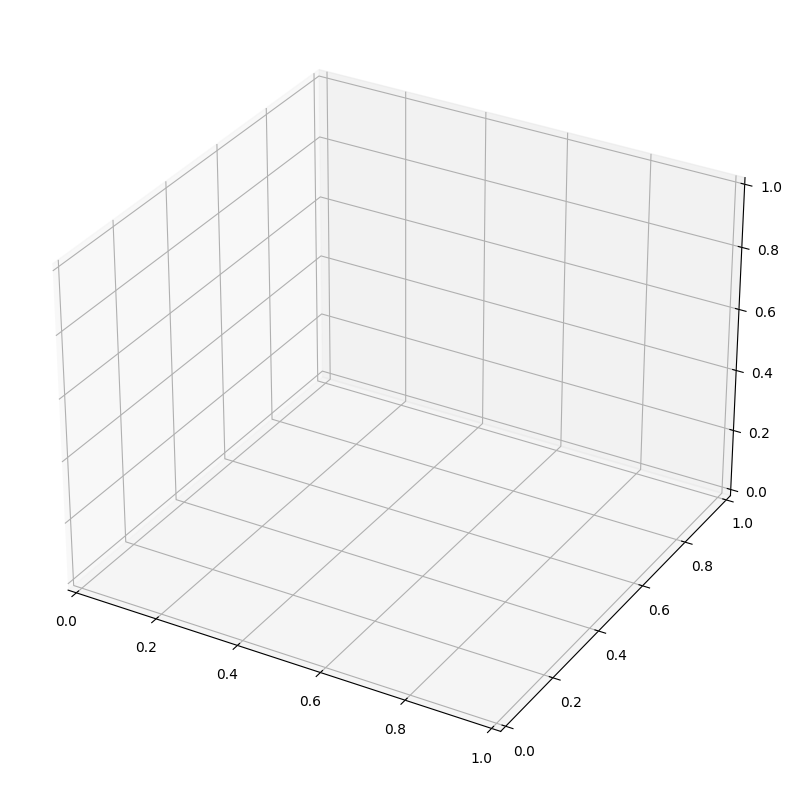

In [3]:
bmplot.cell_rotation_3d(config=config_file,populations_list='all',group_by='pop_name',save_file=False,quiver_length=20,arrow_length_ratio=0.25,max_cells=100)

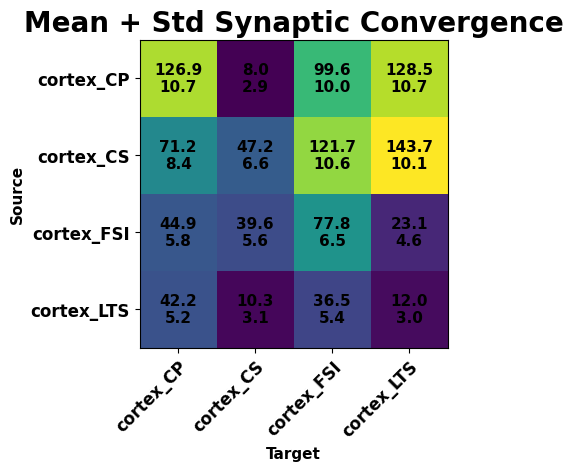

In [11]:
bmplot.convergence_connection_matrix(config=config_file, **kwargs,include_gap=False)

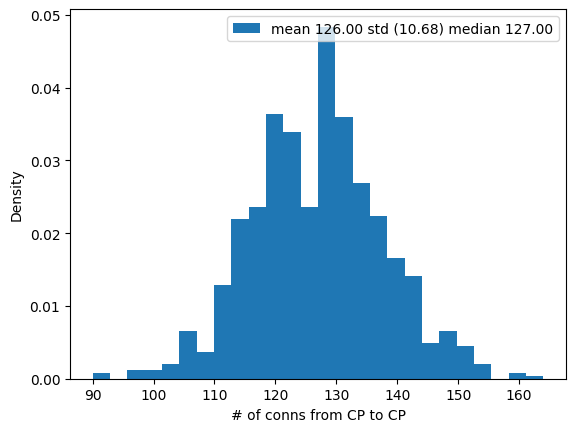

In [12]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Define the function that will be executed based on selected cell types
def simulate_connectivity(source_cell, target_cell):
    bmplot.connection_histogram(config=config_file, source_cell=source_cell, target_cell=target_cell, **kwargs,include_gap=False)

# Define the options for source and target cell types
cell_types = ['CP cell', 'CS cell', 'FSI cell', 'LTS cell']

# Create dropdown widgets for source and target cell selection
source_dropdown = widgets.Dropdown(options=cell_types, description='Source Cell:')
target_dropdown = widgets.Dropdown(options=cell_types, description='Target Cell:')

# Create a button widget to trigger the simulation
simulate_button = widgets.Button(description='Plot')

# Function to handle button click event and execute simulation
def on_simulate_button_click(b):
    source_cell = source_dropdown.value.replace(' cell', '')  # Extract cell type from dropdown value
    target_cell = target_dropdown.value.replace(' cell', '')  # Extract cell type from dropdown value
    clear_output()
    display(widgets.VBox([source_dropdown, target_dropdown, simulate_button]))
    simulate_connectivity(source_cell, target_cell)

# Register the button click event with the on_simulate_button_click function
simulate_button.on_click(on_simulate_button_click)

# Display the interactive widgets initially
display(widgets.VBox([source_dropdown, target_dropdown, simulate_button]))


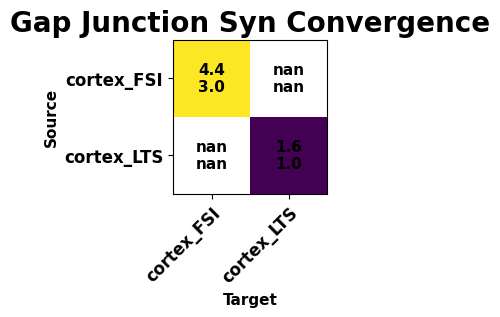

In [13]:
bmplot.gap_junction_matrix(config=config_file,**kwargs)

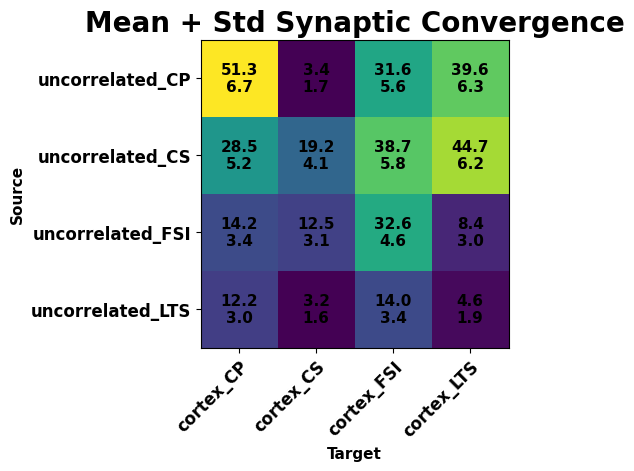

In [14]:
bmplot.convergence_connection_matrix(config=config_file, **{**kwargs, 'sources': 'uncorrelated'})